In [1]:
import pandas as pd

df = pd.read_pickle('lagged_data.pkl')

In [2]:
import matplotlib.pyplot as plt
wage_multiplier = {'Year': 1,
                    'Hour': 2080,
                    'Month': 12,
                    'Week': 52,
                    'Bi-Weekly': 26}
df['PREVAILING_WAGE_1'] = df.apply(lambda row: row["PREVAILING_WAGE_1"]*wage_multiplier[row["PW_UNIT_OF_PAY_1"]],axis=1)

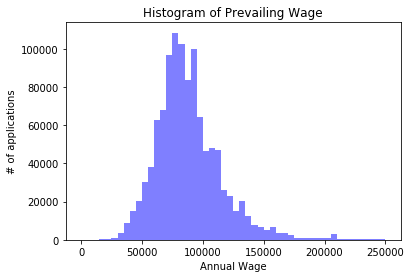

In [3]:
n, bins, patches = plt.hist(df[df['PREVAILING_WAGE_1']<250000]['PREVAILING_WAGE_1'], 50, facecolor='blue', alpha=0.5)
plt.xlabel('Annual Wage')
plt.ylabel('# of applications')
plt.title('Histogram of Prevailing Wage')
plt.show()

In [4]:
# fix SOC code excel bug
november_fixer = {'Nov-11': '11-2011',
                      'Nov-21': '11-3021',
                      'Nov-22': '11-2022',
                      'Nov-31': '11-3031',
                      'Nov-51': '11-3051',
                      'Nov-61': '11-3061',
                      'Nov-71': '11-3071',
                      'Nov-13': '11-3013',
                      'Nov-32': '11-2032',
                      'Nov-33': '11-9033',
                      'Nov-39': '11-9039',
                      'Nov-41': '11-9041',
                      'Nov-81': '11-9081',
                      'Nov-99': '11-9199'}
df['SOC_CODE'] = df['SOC_CODE'].replace(november_fixer)
# truncate SOC codes
df["SOC_CODE"] = df.apply(lambda row: row["SOC_CODE"][0:2],axis=1)



In [5]:
df.groupby('SOC_CODE').count()['PREVAILING_WAGE_1'].sort_values(ascending=False).head(10)

SOC_CODE
15    793455
17     77568
13     77440
19     34720
11     34578
29     29007
25     24101
27      9957
41      5067
23      3160
Name: PREVAILING_WAGE_1, dtype: int64

C:\Users\kmsha\anaconda3\envs\hw4\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


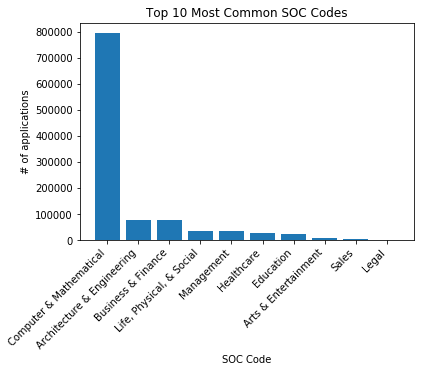

In [6]:
import numpy as np
soc = df.groupby('SOC_CODE').count()['PREVAILING_WAGE_1'].sort_values(ascending=False).head(10)
soc_translator = {'15': 'Computer & Mathematical',
                 '17': 'Architecture & Engineering',
                '13': 'Business & Finance',
                '19': 'Life, Physical, & Social',
                '11': 'Management',
                '29': 'Healthcare',
                '25': 'Education',
                '27': 'Arts & Entertainment',
                '41': 'Sales',
                '23': 'Legal'}
bar = plt.bar(x=pd.Series(soc.index).map(soc_translator), height=soc.values)
plt.xlabel('SOC Code')
ax = plt.subplot()
ax.set_xticklabels(labels=pd.Series(soc.index).map(soc_translator),
                   rotation=45, horizontalalignment='right')
plt.ylabel('# of applications')
plt.title('Top 10 Most Common SOC Codes')
plt.show()